In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.constants as cnt
from scipy.optimize import curve_fit

In [80]:
data = np.loadtxt('data/Kennlinie_Anode_GND/71_6.txt', skiprows=3)
offset = 300
U = data[offset:,0]
I = data[offset:, 1]
window_size = 30
polyorder = 2
I = savgol_filter(I, window_size, polyorder)

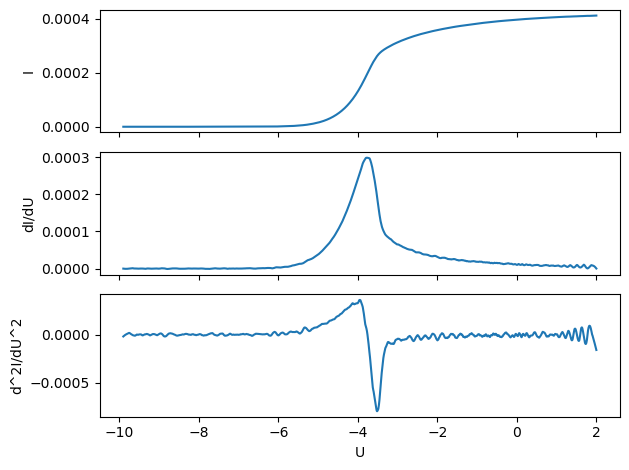

In [81]:
# Calculate the first derivative
dI_dU = np.gradient(I, U)

dI_dU = savgol_filter(dI_dU, window_size, polyorder)

# Calculate the second derivative
d2I_dU2 = np.gradient(dI_dU, U)
d2I_dU2 = savgol_filter(d2I_dU2, window_size, polyorder)

# Plot the original data, first derivative, and second derivative
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].plot(U, I)
ax[0].set_ylabel('I')

ax[1].plot(U, dI_dU)
ax[1].set_ylabel('dI/dU')

ax[2].plot(U, d2I_dU2)
ax[2].set_xlabel('U')
ax[2].set_ylabel('d^2I/dU^2')

plt.tight_layout()
plt.show()

[(0.0, 5.7780000000000005), Text(0.5, 0, '$E / \\mathrm{eV}$')]

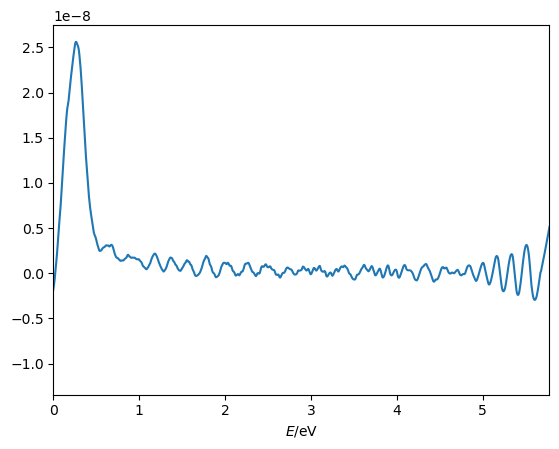

In [82]:
fig2, ax2 = plt.subplots()
A = 1
f_U = - 1/(2 * np.pi) * cnt.m_e **2 / cnt.e **3 * 1/A * d2I_dU2
E = U - U[np.argmax(dI_dU)]
ax2.plot(E, f_U)
ax2.set(xlim=[0, max(E)], xlabel="$E / \\mathrm{eV}$")

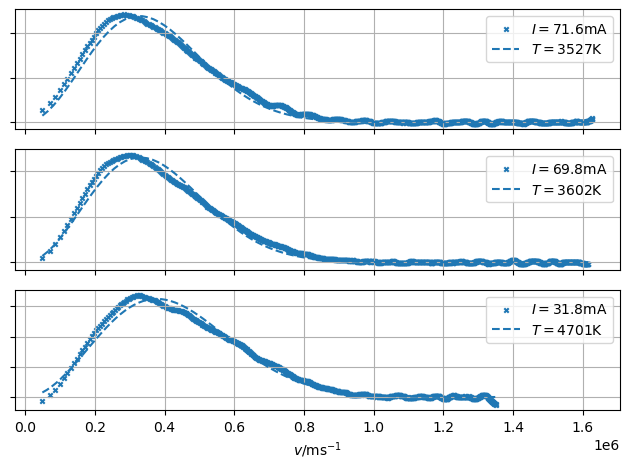

In [171]:
def f_maxwell(v, C, T):
    return C*4*np.pi*(cnt.m_e / (np.pi * cnt.k * T))**(3.0/2.0)* v**2 * np.exp(-cnt.m_e*v**2/(2*cnt.k*T))
def plot_energy_distrib(filename, ax):
    data = np.loadtxt(f'data/Kennlinie_Anode_GND/{filename}.txt', skiprows=3)
    offset = 100
    U = data[offset:,0]
    I = data[offset:, 1]
    window_size = 50
    polyorder = 3
    I = savgol_filter(I, window_size, polyorder)
    dI_dU = np.gradient(I, U)
    dI_dU = savgol_filter(dI_dU, window_size, polyorder)
    # Calculate the second derivative
    d2I_dU2 = np.gradient(dI_dU, U)
    d2I_dU2 = savgol_filter(d2I_dU2, window_size, polyorder)
    A = 9.2e-6
    plasma_potential_index=np.argmax(dI_dU)
    E = -(U - U[plasma_potential_index])
    f_U =  1/(2 * np.pi) * cnt.m_e **2 / cnt.e **3 * 1/A * d2I_dU2 #* 4 * np.pi * np.sqrt(2 * E / m)

    #print(plasma_potential_index)
    E = E[0:plasma_potential_index]
    f_U = f_U[0:plasma_potential_index]


    vs = np.sqrt(2* cnt.e * E / cnt.m_e)

    ax.scatter(vs, f_U,10, marker='x', label=f"$I = {filename.replace('_', '.')}\\mathrm{{mA}}$")


    p0 = [100, cnt.m_e / (2 * cnt.k) * vs[np.argmax(f_U)] **2 ]  # Initial guess for the parameters C and T

    params, cov = curve_fit(f_maxwell, vs, f_U, p0=p0)

    v_fit = np.linspace(np.min(vs), np.max(vs), 100)
    f_U_fit = f_maxwell(v_fit, *params)
    ax.plot(v_fit, f_U_fit, label=f'$T =  {params[1]:.4g} \\mathrm{{K}}$', ls='--')
    ax.grid()
    ax.legend()
    ax.set_yticklabels([])


fig3, (ax3, ax4, ax5) = plt.subplots(3,1, sharex=True)
plot_energy_distrib('71_6', ax3)
plot_energy_distrib('69_8', ax4)
plot_energy_distrib('31_8', ax5)
ax5.set(xlabel="$v / \\mathrm{m s^{-1}}$")

fig3.tight_layout()

fig3.savefig('out/maxwell')
#plot_energy_distrib('71_6', ax3)

#plot_energy_distrib('60_3', ax3)


In [78]:
#4 pi v**2
